In [1]:
import pandas as pd
df = pd.read_csv("county.csv", sep=",")
# remove extraneous columns
df.drop(df.columns[[0,1,3,5,6,7,8]], axis=1, inplace=True)
print(df.head(10))
print("shape: " + str(df.shape))

           RegionName StateName  1996-01-31  1996-02-29  1996-03-31  \
0  Los Angeles County        CA    180856.0    180903.0    180992.0   
1         Cook County        IL    151739.0    151513.0    151163.0   
2       Harris County        TX    102209.0    102281.0    102292.0   
3     Maricopa County        AZ    121139.0    121478.0    121863.0   
4    San Diego County        CA    194522.0    194186.0    194005.0   
5       Orange County        CA    224601.0    225520.0    225410.0   
6        Kings County        NY    214461.0    213803.0    213384.0   
7   Miami-Dade County        FL    122564.0    122718.0    122890.0   
8       Dallas County        TX     98322.0     98383.0     98588.0   
9       Queens County        NY    223504.0    223046.0    222935.0   

   1996-04-30  1996-05-31  1996-06-30  1996-07-31  1996-08-31  ...  \
0    181173.0    181344.0    181554.0    181818.0    181834.0  ...   
1    151032.0    150598.0    150652.0    150421.0    150720.0  ...   
2    102

In [2]:
fdf = df.melt(id_vars=["RegionName", "StateName"], var_name="Date", value_name="ZHVI")
print(fdf.head(10))

           RegionName StateName        Date      ZHVI
0  Los Angeles County        CA  1996-01-31  180856.0
1         Cook County        IL  1996-01-31  151739.0
2       Harris County        TX  1996-01-31  102209.0
3     Maricopa County        AZ  1996-01-31  121139.0
4    San Diego County        CA  1996-01-31  194522.0
5       Orange County        CA  1996-01-31  224601.0
6        Kings County        NY  1996-01-31  214461.0
7   Miami-Dade County        FL  1996-01-31  122564.0
8       Dallas County        TX  1996-01-31   98322.0
9       Queens County        NY  1996-01-31  223504.0


In [ ]:
counties = fdf["RegionName"].unique()
print(counties)

In [ ]:
county_dfs = {}
for c in counties:
    county_dfs[c] = (fdf.loc[fdf['RegionName'] == c])
print(county_dfs)

In [5]:
import matplotlib.pyplot as plt
plt.figure()
la_county = county_dfs["Los Angeles County"]
print(la_county.tail())
la_county.plot(x='Date', y='ZHVI')

                RegionName StateName        Date      ZHVI
832260  Los Angeles County        CA  2020-04-30  677947.0
835120  Los Angeles County        CA  2020-05-31  679840.0
837980  Los Angeles County        CA  2020-06-30  681217.0
840840  Los Angeles County        CA  2020-07-31  686660.0
843700  Los Angeles County        CA  2020-08-31  694689.0


monthly inflation: 0.00291666666667
1.0


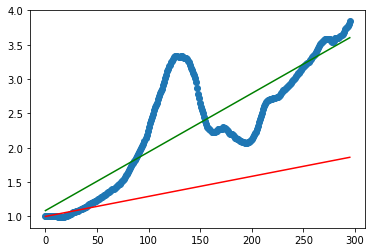

score: 0.7252776826644703
coefficient: 0.008528113192175921


In [6]:
# calculate the normalized linear regression of county
import numpy as np
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
X = np.arange(len(la_county.index)).reshape(-1, 1)
first = la_county['ZHVI'].values[0]
Y = la_county['ZHVI'].apply(lambda x: x / first).values.reshape(-1, 1)
linear_regressor.fit(X, Y)
plt.scatter(X, Y)
Y_pred = linear_regressor.predict(X)
plt.plot(X, Y_pred, color='green')

# create data for inflation over same period
months_in_year = 12
yearly_inflation = 0.035
monthly_inflation = yearly_inflation / months_in_year # annuaul inflation converted to months

print("monthly inflation: " + str(monthly_inflation))
Y_inflation = [1 + (i * monthly_inflation) for i in range(len(la_county.index))]
print(Y_inflation[0])
plt.plot(X, Y_inflation, color='red')

plt.show()
print("score: " + str(linear_regressor.score(X,Y)))
print("coefficient: " + str(linear_regressor.coef_[0][0]))

In [34]:
def normalized_lr(data, column):
    linear_regressor = LinearRegression()
    X = np.arange(len(data.index)).reshape(-1, 1)
    first = data[column].values[0]
    Y = data[column].apply(lambda x: x / first).values.reshape(-1, 1)
    linear_regressor.fit(X, Y)
    return linear_regressor.score(X,Y), linear_regressor.coef_[0][0] * 12

growths = []
for c in counties:
    #print("county: " + c)
    county_df = county_dfs[c].dropna()
    r_squared, coef = normalized_lr(county_df, 'ZHVI')
    #print("r^2: " + str(r_squared))
    #print("coef: " + str(coef))
    #print("")
    growths.append((c, coef, r_squared))
growths.sort(key=lambda x: x[1], reverse=True)

[('Blaine County', 0.2109649379348471, 0.10470124686196791), ('New York County', 0.16182259483620448, 0.9100145695625423), ('Phillips County', 0.1584590299728889, 0.22474304656094068), ('San Mateo County', 0.14999580454401648, 0.8578123266317119), ('San Francisco County', 0.1489388618322499, 0.8676160202439902), ('Reeves County', 0.14784392506622296, 0.9929376236608674), ('Santa Clara County', 0.14082362398191936, 0.8883921654762653), ('Grenada County', 0.1341393307322208, 0.9581094489245124), ('Alameda County', 0.1328524023129632, 0.8238097105925719), ('Gem County', 0.1274117231435246, 0.9806939429706707), ('Dallam County', 0.12246259747943639, 0.9915355609752506), ('District of Columbia', 0.12008365123921515, 0.9301455075916284), ('Charles Mix County', 0.11795320124335512, 0.9795365605033369), ('Napa County', 0.11708741291182029, 0.7820125798424683), ('Gentry County', 0.11678150001081924, 0.9521571260094327), ('Garfield County', 0.11615596170143588, 0.3266863023650244), ('Andrews Cou